In [1]:
import sqlite3

# Connect and create DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert data from your table
data = [
    ("Laptop", 40, 9055.03),
    ("Smartphone", 9, 10289.17),
    ("Headphones", 31, 1648.26),
    ("Tablet", 25, 15301.88),
    ("Camera", 45, 10246.91),
    ("Smartwatch", 35, 16557.87),
    ("Printer", 34, 18204.82),
    ("Monitor", 1, 1188.77),
    ("Router", 18, 9061.74),
    ("Keyboard", 31, 10161.81)
]

# Clear and insert
cursor.execute("DELETE FROM sales")
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

conn.commit()
conn.close()


      product  total_qty    revenue
0      Camera         45  461110.95
1  Headphones         31   51096.06
2    Keyboard         31  315016.11
3      Laptop         40  362201.20
4     Monitor          1    1188.77
5     Printer         34  618963.88
6      Router         18  163111.32
7  Smartphone          9   92602.53
8  Smartwatch         35  579525.45
9      Tablet         25  382547.00


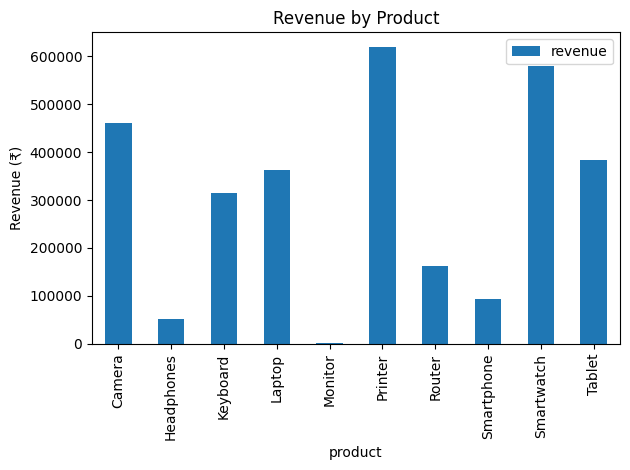

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect
conn = sqlite3.connect("sales_data.db")

# SQL Query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into DataFrame
df = pd.read_sql_query(query, conn)
print(df)

# Bar Chart
df.plot(kind='bar', x='product', y='revenue')
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()
